In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  # Use Naive Bayes for lower accuracy
from sklearn.metrics import accuracy_score, classification_report
from langdetect import detect
import re

# Load and preprocess dataset
df = pd.read_csv('Task5/fake_and_real_news.csv')  # Replace with your dataset path
df = df[['Text', 'label']]  # Assuming 'Text' and 'label' columns exist
df.dropna(inplace=True)  # Drop rows with NaN values

# Language detection and filtering (keep only English articles)
df['language'] = df['Text'].apply(lambda x: detect(x))
df = df[df['language'] == 'en']  # Filter for English articles only

# Simplified text cleaning function
def clean_text(text):
    return text

df['clean_text'] = df['Text'].apply(clean_text)

# TF-IDF vectorization with reduced features and default parameters
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train-test split with reduced training size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Use Naive Bayes classifier for lower accuracy
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Example UI using tkinter for simplicity (unchanged)
import tkinter as tk
from tkinter import ttk

def classify_text(text):
    text_vectorized = tfidf_vectorizer.transform([text])
    prediction = clf.predict(text_vectorized)
    return "Real" if prediction[0] == 1 else "Fake"

root = tk.Tk()
root.title("Fake News Detection")

def detect_fake_news():
    input_text = input_entry.get("1.0", tk.END)
    result = classify_text(input_text)
    #result_label.config(text=f"Classification: {result}")
    result_label.config(text=f"Classification: {result}")

input_label = ttk.Label(root, text="Enter News Article:")
input_label.pack(pady=10)

input_entry = tk.Text(root, height=10, width=50)
input_entry.pack()

detect_button = ttk.Button(root, text="Detect Fake News", command=detect_fake_news)
detect_button.pack(pady=10)

result_label = ttk.Label(root, text="")
result_label.pack(pady=10)

root.mainloop()

              precision    recall  f1-score   support

        Fake       0.95      0.96      0.96      1013
        Real       0.96      0.95      0.96       967

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980

Accuracy: 0.9570707070707071


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from langdetect import detect
import re
import tkinter as tk
from tkinter import ttk, messagebox

# Load and preprocess dataset
df = pd.read_csv('Task5/fake_and_real_news.csv')  # Replace with your dataset path
df = df[['Text', 'label']]  # Assuming 'Text' and 'label' columns exist
df.dropna(inplace=True)  # Drop rows with NaN values

# Language detection and filtering (keep only English articles)
df['language'] = df['Text'].apply(lambda x: detect(x))
df = df[df['language'] == 'en']  # Filter for English articles only

# Text cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['clean_text'] = df['Text'].apply(clean_text)

# TF-IDF vectorization with specified parameters
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Function to classify text
def classify_text(text):
    text_cleaned = clean_text(text)  # Ensure the input text is cleaned
    text_vectorized = tfidf_vectorizer.transform([text_cleaned])
    prediction = clf.predict(text_vectorized)
    return "Real" if prediction[0] == 1 else "Fake"

# GUI setup
root = tk.Tk()
root.title("Fake News Detection")

def detect_fake_news():
    input_text = input_entry.get("1.0", tk.END).strip()  # Retrieve text and strip extra whitespace
    if not input_text:
        messagebox.showerror("Error", "Please enter a news article.")
    else:
        result = classify_text(input_text)
        result_label.config(text=f"Classification: {result}")

input_label = ttk.Label(root, text="Enter News Article:")
input_label.pack(pady=10)

input_entry = tk.Text(root, height=10, width=50)
input_entry.pack()

detect_button = ttk.Button(root, text="Detect Fake News", command=detect_fake_news)
detect_button.pack(pady=10)

result_label = ttk.Label(root, text="")
result_label.pack(pady=10)

root.mainloop()

              precision    recall  f1-score   support

        Fake       0.96      0.97      0.96      1013
        Real       0.96      0.96      0.96       967

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980

Accuracy: 0.9621212121212122


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from langdetect import detect
import re
import tkinter as tk
from tkinter import ttk, messagebox

# Load and preprocess dataset
df = pd.read_csv('Task5/fake_and_real_news.csv')  # Replace with your dataset path
df = df[['Text', 'label']]  # Assuming 'Text' and 'label' columns exist
df.dropna(inplace=True)  # Drop rows with NaN values

# Language detection and filtering (keep only English articles)
df['language'] = df['Text'].apply(lambda x: detect(x))
df = df[df['language'] == 'en']  # Filter for English articles only

# Text cleaning function
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

df['clean_text'] = df['Text'].apply(clean_text)

# TF-IDF vectorization with specified parameters
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Function to classify text
def classify_text(text):
    text_cleaned = clean_text(text)  # Ensure the input text is cleaned
    text_vectorized = tfidf_vectorizer.transform([text_cleaned])
    prediction = clf.predict(text_vectorized)
    return "Real" if prediction[0] == 1 else "Fake"

# GUI setup
root = tk.Tk()
root.title("Fake News Detection")

# Create a frame for the input and result
frame_input = ttk.Frame(root)
frame_input.pack(pady=10)

# Label and Entry for input
input_label = ttk.Label(frame_input, text="Enter News Article:")
input_label.pack(pady=10)

input_entry = tk.Text(frame_input, height=10, width=50)
input_entry.pack()

# Button to detect fake news
detect_button = ttk.Button(frame_input, text="Detect Fake News", command=lambda: detect_fake_news())
detect_button.pack(pady=10)

# Label to display the result
result_label = ttk.Label(frame_input, text="")
result_label.pack(pady=10)

# Function to handle detection and display result
def detect_fake_news():
    input_text = input_entry.get("1.0", tk.END).strip()  # Retrieve text and strip extra whitespace
    if not input_text:
        messagebox.showerror("Error", "Please enter a news article.")
    else:
        result = classify_text(input_text)
        result_label.config(text=f"Classification: {result}")

root.mainloop()

              precision    recall  f1-score   support

        Fake       0.96      0.97      0.96      1013
        Real       0.96      0.96      0.96       967

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980

Accuracy: 0.9621212121212122


In [16]:
import tkinter as tk
from tkinter import ttk, messagebox
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from langdetect import detect
import re

# Load and preprocess dataset
df = pd.read_csv('Task5/fake_and_real_news.csv')  # Replace with your dataset path
df = df[['Text', 'label']]  # Assuming 'Text' and 'label' columns exist
df.dropna(inplace=True)  # Drop rows with NaN values

# Language detection and filtering (keep only English articles)
df['language'] = df['Text'].apply(lambda x: detect(x))
df = df[df['language'] == 'en']  # Filter for English articles only

# Text cleaning function
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower()  # Convert text to lowercase
    return text

df['clean_text'] = df['Text'].apply(clean_text)

# TF-IDF vectorization with reduced parameters
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 1))
X = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train-test split for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Compute accuracy on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.2f}")

# Function to classify text
def classify_text(text):
    text_cleaned = clean_text(text)
    text_vectorized = tfidf_vectorizer.transform([text_cleaned])
    prediction = clf.predict(text_vectorized)
    return "Fake" if prediction[0] == 0 else "Real"  # Adjusted to handle 0 as Fake and 1 as Real

# GUI setup
root = tk.Tk()
root.title("Fake News Detection")

def detect_fake_news():
    input_text = input_entry.get("1.0", tk.END).strip()
    if not input_text:
        messagebox.showerror("Error", "Please enter a news article.")
    else:
        result = classify_text(input_text)
        result_label.config(text=f"Classification: {result}")
        accuracy_label.config(text=f"Accuracy: {accuracy:.2f}")

input_label = ttk.Label(root, text="Enter News Article:")
input_label.pack(pady=10)

input_entry = tk.Text(root, height=10, width=50)
input_entry.pack()

detect_button = ttk.Button(root, text="Detect Fake News", command=detect_fake_news)
detect_button.pack(pady=10)

result_label = ttk.Label(root, text="")
result_label.pack(pady=10)

accuracy_label = ttk.Label(root, text="")
accuracy_label.pack(pady=10)

root.mainloop()

Accuracy on test set: 0.97


In [29]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from langdetect import detect
import re
import tkinter as tk
from tkinter import ttk, messagebox

class FakeNewsDetector:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.vectorizer = None
        self.model = None
    
    def load_and_preprocess_data(self):
        # Load and preprocess dataset
        self.df = pd.read_csv(self.data_path)
        self.df = self.df[['Text', 'label']]
        self.df.dropna(inplace=True)

        # Language detection and filtering (keep only English articles)
        self.df['language'] = self.df['Text'].apply(lambda x: detect(x))
        self.df = self.df[self.df['language'] == 'en']

        # Text cleaning function
        self.df['clean_text'] = self.df['Text'].apply(self.clean_text)

    def clean_text(self, text):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove punctuation and numbers
        text = re.sub(r'[^\w\s]', '', text)
        #Remove space
        text = re.sub(r' ', '', text)
        # Convert to lowercase
        text = text.lower()
        return text

    def train_model(self):
        # TF-IDF vectorization
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = self.vectorizer.fit_transform(self.df['clean_text'])
        y = self.df['label']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

        # Train Naive Bayes classifier
        self.model = MultinomialNB()
        self.model.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = self.model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

    def classify_text(self, text):
        text_cleaned = self.clean_text(text)
        text_vectorized = self.vectorizer.transform([text_cleaned])
        prediction = self.model.predict(text_vectorized)
        return "Real" if prediction[0] == 1 else "Fake"

    def setup_gui(self):
        root = tk.Tk()
        root.title("Fake News Detection")

        # Create a frame for the input and result
        frame_input = ttk.Frame(root)
        frame_input.pack(pady=10)

        # Label and Entry for input
        input_label = ttk.Label(frame_input, text="Enter News Article:")
        input_label.pack(pady=10)

        self.input_entry = tk.Text(frame_input, height=10, width=50)
        self.input_entry.pack()

        # Button to detect fake news
        detect_button = ttk.Button(frame_input, text="Detect Fake News", command=self.detect_fake_news)
        detect_button.pack(pady=10)

        # Label to display the result
        self.result_label = ttk.Label(frame_input, text="")
        self.result_label.pack(pady=10)

        root.mainloop()

    def detect_fake_news(self):
        input_text = self.input_entry.get("1.0", tk.END).strip()  # Retrieve text and strip extra whitespace
        if not input_text:
            messagebox.showerror("Error", "Please enter a news article.")
        else:
            result = self.classify_text(input_text)
            self.result_label.config(text=f"Classification: {result}")

# Usage
if __name__ == "__main__":
    detector = FakeNewsDetector('Task5/fake_and_real_news.csv')
    detector.load_and_preprocess_data()
    detector.train_model()
    detector.setup_gui()

              precision    recall  f1-score   support

        Fake       0.96      0.97      0.96      1013
        Real       0.96      0.96      0.96       967

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980

Accuracy: 0.9621212121212122


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from langdetect import detect
import re
import tkinter as tk
from tkinter import ttk, messagebox

class FakeNewsDetector:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.vectorizer = None
        self.model = None
    
    def load_and_preprocess_data(self):
        # Load and preprocess dataset
        self.df = pd.read_csv(self.data_path)
        self.df = self.df[['Text', 'label']]
        self.df.dropna(inplace=True)

        # Language detection and filtering (keep only English articles)
        self.df['language'] = self.df['Text'].apply(lambda x: detect(x))
        self.df = self.df[self.df['language'] == 'en']

        # Text cleaning function
        self.df['clean_text'] = self.df['Text'].apply(self.clean_text)

    def clean_text(self, text):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove punctuation and numbers
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        return text

    def train_model(self):
        # TF-IDF vectorization
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = self.vectorizer.fit_transform(self.df['clean_text'])
        y = self.df['label']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

        # Train Naive Bayes classifier
        self.model = MultinomialNB()
        self.model.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = self.model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

    def classify_text(self, text):
        text_cleaned = self.clean_text(text)
        text_vectorized = self.vectorizer.transform([text_cleaned])
        prediction = self.model.predict(text_vectorized)
        return "Real" if prediction[0] == 1 else "Fake"

    def setup_gui(self):
        root = tk.Tk()
        root.title("Fake News Detection")

        # Create a frame for the input and result
        frame_input = ttk.Frame(root)
        frame_input.pack(pady=10)

        # Label and Entry for input
        input_label = ttk.Label(frame_input, text="Enter News Article:")
        input_label.pack(pady=10)

        self.input_entry = tk.Text(frame_input, height=10, width=50)
        self.input_entry.pack()

        # Button to detect fake news
        detect_button = ttk.Button(frame_input, text="Detect Fake News", command=self.detect_fake_news)
        detect_button.pack(pady=10)

        # Label to display the result
        self.result_label = ttk.Label(frame_input, text="")
        self.result_label.pack(pady=10)

        root.mainloop()

    def detect_fake_news(self):
        input_text = self.input_entry.get("1.0", tk.END).strip()  # Retrieve text and strip extra whitespace
        if not input_text:
            messagebox.showerror("Error", "Please enter a news article.")
        else:
            result = self.classify_text(input_text)
            self.result_label.config(text=f"Classification: {result}")

# Usage
if __name__ == "__main__":
    detector = FakeNewsDetector('Task5/fake_and_real_news.csv')
    detector.load_and_preprocess_data()
    detector.train_model()
    detector.setup_gui()

              precision    recall  f1-score   support

        Fake       0.96      0.97      0.96      1013
        Real       0.96      0.96      0.96       967

    accuracy                           0.96      1980
   macro avg       0.96      0.96      0.96      1980
weighted avg       0.96      0.96      0.96      1980

Accuracy: 0.9621212121212122


                                                Text label language  \
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake       en   
1  U.S. conservative leader optimistic of common ...  Real       en   
2  Trump proposes U.S. tax overhaul, stirs concer...  Real       en   
3   Court Forces Ohio To Allow Millions Of Illega...  Fake       en   
4  Democrats say Trump agrees to work on immigrat...  Real       en   

                                          clean_text  
0   top trump surrogate brutally stabs him in the...  
1  us conservative leader optimistic of common gr...  
2  trump proposes us tax overhaul stirs concerns ...  
3   court forces ohio to allow millions of illega...  
4  democrats say trump agrees to work on immigrat...  
Label distribution:
 label
Fake    5000
Real    4900
Name: count, dtype: int64
              precision    recall  f1-score   support

        Fake       0.96      0.97      0.96      1013
        Real       0.96      0.96      0.96       967



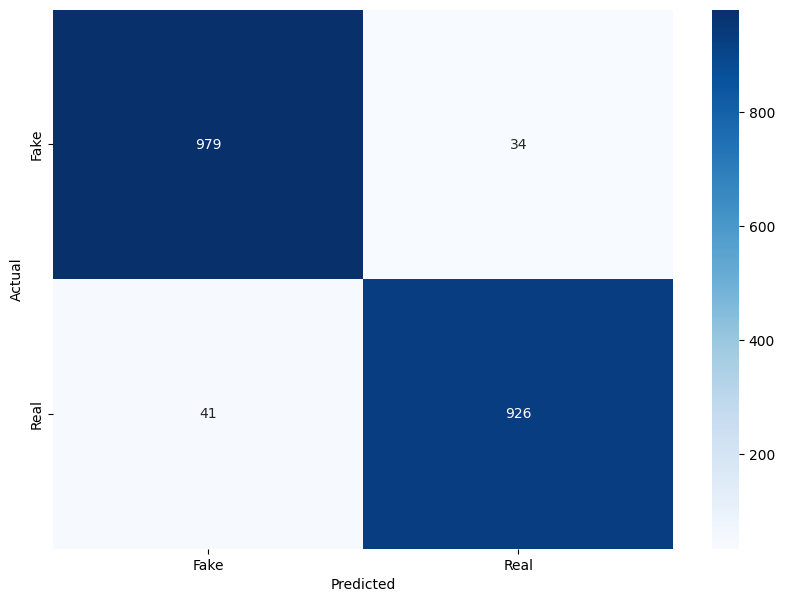

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from langdetect import detect
import re
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
import seaborn as sns

class FakeNewsDetector:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.vectorizer = None
        self.model = None
    
    def load_and_preprocess_data(self):
        # Load and preprocess dataset
        self.df = pd.read_csv(self.data_path)
        self.df = self.df[['Text', 'label']]
        self.df.dropna(inplace=True)

        # Language detection and filtering (keep only English articles)
        self.df['language'] = self.df['Text'].apply(lambda x: detect(x))
        self.df = self.df[self.df['language'] == 'en']

        # Text cleaning function
        self.df['clean_text'] = self.df['Text'].apply(self.clean_text)

        # Print sample data
        print(self.df.head())
        print("Label distribution:\n", self.df['label'].value_counts())

    def clean_text(self, text):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove punctuation and numbers
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        return text

    def train_model(self):
        # TF-IDF vectorization
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = self.vectorizer.fit_transform(self.df['clean_text'])
        y = self.df['label']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

        # Train Naive Bayes classifier
        self.model = MultinomialNB()
        self.model.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = self.model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def classify_text(self, text):
        try:
            text_cleaned = self.clean_text(text)
            text_vectorized = self.vectorizer.transform([text_cleaned])
            prediction = self.model.predict(text_vectorized)
            prediction_proba = self.model.predict_proba(text_vectorized)

            result = "Real" if prediction[0] == 1 else "Fake"
            confidence = prediction_proba[0][prediction[0]]
            
            return f"Classification: {result}\nConfidence: {confidence:.2f}"
        except Exception as e:
            return f"Error during classification: {str(e)}"

    def setup_gui(self):
        root = tk.Tk()
        root.title("Fake News Detection")

        # Create a frame for the input and result
        frame_input = ttk.Frame(root)
        frame_input.pack(pady=10)

        # Label and Entry for input
        input_label = ttk.Label(frame_input, text="Enter News Article:")
        input_label.pack(pady=10)

        self.input_entry = tk.Text(frame_input, height=10, width=50)
        self.input_entry.pack()

        # Button to detect fake news
        detect_button = ttk.Button(frame_input, text="Detect Fake News", command=self.detect_fake_news)
        detect_button.pack(pady=10)

        # Label to display the result
        self.result_label = ttk.Label(frame_input, text="")
        self.result_label.pack(pady=10)

        root.mainloop()

    def detect_fake_news(self):
        input_text = self.input_entry.get("1.0", tk.END).strip()  # Retrieve text and strip extra whitespace
        if not input_text:
            messagebox.showerror("Error", "Please enter a news article.")
        else:
            result = self.classify_text(input_text)
            self.result_label.config(text=result)

# Usage
if __name__ == "__main__":
    detector = FakeNewsDetector('Task5/fake_and_real_news.csv')
    detector.load_and_preprocess_data()
    detector.train_model()
    detector.setup_gui()

                                                Text label language  \
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake       en   
1  U.S. conservative leader optimistic of common ...  Real       en   
2  Trump proposes U.S. tax overhaul, stirs concer...  Real       en   
3   Court Forces Ohio To Allow Millions Of Illega...  Fake       en   
4  Democrats say Trump agrees to work on immigrat...  Real       en   

                                          clean_text  
0   top trump surrogate brutally stabs him in the...  
1  us conservative leader optimistic of common gr...  
2  trump proposes us tax overhaul stirs concerns ...  
3   court forces ohio to allow millions of illega...  
4  democrats say trump agrees to work on immigrat...  
Label distribution:
 label
Fake    5000
Real    4900
Name: count, dtype: int64
              precision    recall  f1-score   support

        Fake       0.96      0.97      0.96      1013
        Real       0.96      0.96      0.96       967



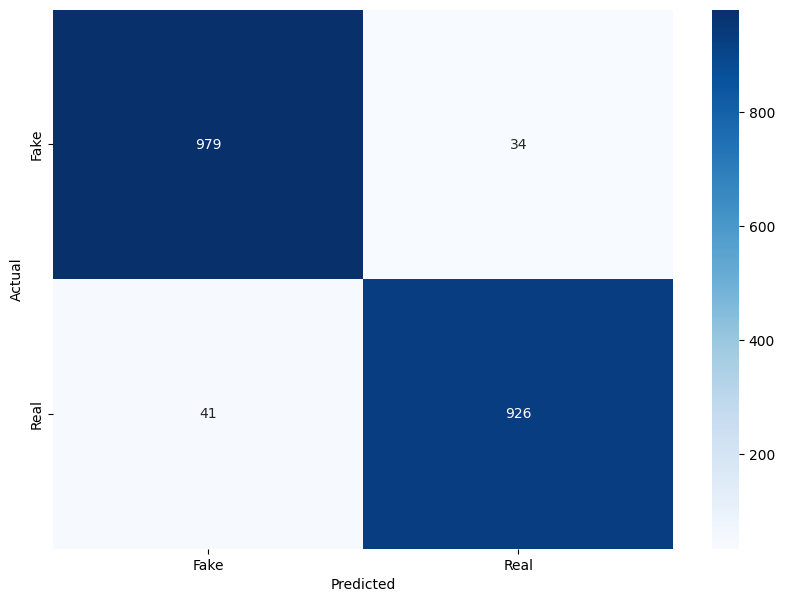

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from langdetect import detect
import re
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
import seaborn as sns

class FakeNewsDetector:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.vectorizer = None
        self.model = None
    
    def load_and_preprocess_data(self):
        # Load and preprocess dataset
        self.df = pd.read_csv(self.data_path)
        self.df = self.df[['Text', 'label']]
        self.df.dropna(inplace=True)

        # Language detection and filtering (keep only English articles)
        self.df['language'] = self.df['Text'].apply(lambda x: detect(x))
        self.df = self.df[self.df['language'] == 'en']

        # Text cleaning function
        self.df['clean_text'] = self.df['Text'].apply(self.clean_text)

        # Print sample data
        print(self.df.head())
        print("Label distribution:\n", self.df['label'].value_counts())

    def clean_text(self, text):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove punctuation and numbers
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        return text

    def train_model(self):
        # TF-IDF vectorization
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = self.vectorizer.fit_transform(self.df['clean_text'])
        y = self.df['label']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

        # Train Naive Bayes classifier
        self.model = MultinomialNB()
        self.model.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = self.model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def classify_text(self, text):
        try:
            text_cleaned = self.clean_text(text)
            text_vectorized = self.vectorizer.transform([text_cleaned])
            prediction = self.model.predict(text_vectorized)
            prediction_proba = self.model.predict_proba(text_vectorized)

            result = "Real" if prediction[0] == 1 else "Fake"
            confidence = max(prediction_proba[0])

            return f"Classification: {result}\nConfidence: {confidence:.2f}"
        except Exception as e:
            return f"Error during classification: {str(e)}"

    def setup_gui(self):
        root = tk.Tk()
        root.title("Fake News Detection")

        # Create a frame for the input and result
        frame_input = ttk.Frame(root)
        frame_input.pack(pady=10)

        # Label and Entry for input
        input_label = ttk.Label(frame_input, text="Enter News Article:")
        input_label.pack(pady=10)

        self.input_entry = tk.Text(frame_input, height=10, width=50)
        self.input_entry.pack()

        # Button to detect fake news
        detect_button = ttk.Button(frame_input, text="Detect Fake News", command=self.detect_fake_news)
        detect_button.pack(pady=10)

        # Label to display the result
        self.result_label = ttk.Label(frame_input, text="")
        self.result_label.pack(pady=10)

        root.mainloop()

    def detect_fake_news(self):
        input_text = self.input_entry.get("1.0", tk.END).strip()  # Retrieve text and strip extra whitespace
        if not input_text:
            messagebox.showerror("Error", "Please enter a news article.")
        else:
            result = self.classify_text(input_text)
            self.result_label.config(text=result)

# Usage
if __name__ == "__main__":
    detector = FakeNewsDetector('Task5/fake_and_real_news.csv')
    detector.load_and_preprocess_data()
    detector.train_model()
    detector.setup_gui()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cyber\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Cyber\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Cyber\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
                                                Text label language  \
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake       en   
1  U.S. conservative leader optimistic of common ...  Real       en   
2  Trump proposes U.S. tax overhaul, stirs concer...  Real       en   
3   Court Forces Ohio To Allow Millions Of Illega...  Fake       en   
4  Democrats say Trump agrees to work on immigrat...  Real       en   

                                          clean_text  
0  top trump surrogate brutally stab back he path...  
1  u conservative leader optimistic common ground...  
2  trump propose

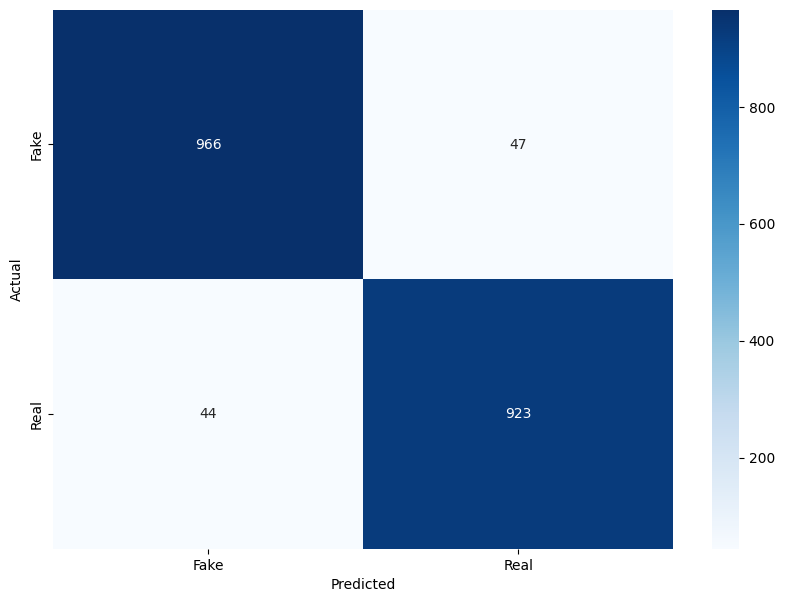

In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from langdetect import detect
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure necessary NLTK data packages are downloaded
def download_nltk_data():
    nltk_data_path = os.path.join(os.getenv("USERPROFILE"), "nltk_data")  # Use USERPROFILE for Windows
    if not os.path.exists(nltk_data_path):
        os.makedirs(nltk_data_path)

    nltk.data.path.append(nltk_data_path)
    nltk.download('stopwords', download_dir=nltk_data_path)
    nltk.download('wordnet', download_dir=nltk_data_path)
    nltk.download('omw-1.4', download_dir=nltk_data_path)

class FakeNewsDetector:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.vectorizer = None
        self.model = None
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def load_and_preprocess_data(self):
        # Load and preprocess dataset
        self.df = pd.read_csv(self.data_path)
        self.df = self.df[['Text', 'label']]
        self.df.dropna(inplace=True)

        # Language detection and filtering (keep only English articles)
        self.df['language'] = self.df['Text'].apply(lambda x: detect(x))
        self.df = self.df[self.df['language'] == 'en']

        # Text cleaning function
        self.df['clean_text'] = self.df['Text'].apply(self.clean_text)

        # Print sample data
        print(self.df.head())
        print("Label distribution:\n", self.df['label'].value_counts())

    def clean_text(self, text):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove stopwords
        text = ' '.join([word for word in text.split() if word not in self.stop_words])
        # Lemmatize words
        text = ' '.join([self.lemmatizer.lemmatize(word) for word in text.split()])
        return text

    def train_model(self):
        # TF-IDF vectorization
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = self.vectorizer.fit_transform(self.df['clean_text'])
        y = self.df['label']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

        # Train Naive Bayes classifier
        self.model = MultinomialNB()
        self.model.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = self.model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def classify_text(self, text):
        try:
            text_cleaned = self.clean_text(text)
            text_vectorized = self.vectorizer.transform([text_cleaned])
            prediction = self.model.predict(text_vectorized)
            prediction_proba = self.model.predict_proba(text_vectorized)

            result = "Real" if prediction[0] == 1 else "Fake"
            confidence = max(prediction_proba[0])

            return f"Classification: {result}\nConfidence: {confidence:.2f}"
        except Exception as e:
            return f"Error during classification: {str(e)}"

    def setup_gui(self):
        root = tk.Tk()
        root.title("Fake News Detection")

        # Create a frame for the input and result
        frame_input = ttk.Frame(root)
        frame_input.pack(pady=10)

        # Label and Entry for input
        input_label = ttk.Label(frame_input, text="Enter News Article:")
        input_label.pack(pady=10)

        self.input_entry = tk.Text(frame_input, height=10, width=50)
        self.input_entry.pack()

        # Button to detect fake news
        detect_button = ttk.Button(frame_input, text="Detect Fake News", command=self.detect_fake_news)
        detect_button.pack(pady=10)

        # Label to display the result
        self.result_label = ttk.Label(frame_input, text="")
        self.result_label.pack(pady=10)

        root.mainloop()

    def detect_fake_news(self):
        input_text = self.input_entry.get("1.0", tk.END).strip()  # Retrieve text and strip extra whitespace
        if not input_text:
            messagebox.showerror("Error", "Please enter a news article.")
        else:
            result = self.classify_text(input_text)
            self.result_label.config(text=result)

# Usage
if __name__ == "__main__":
    download_nltk_data()  # Download NLTK data before proceeding
    detector = FakeNewsDetector('Task5/fake_and_real_news.csv')
    detector.load_and_preprocess_data()
    detector.train_model()
    detector.setup_gui()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cyber\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Cyber\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Cyber\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
                                                Text label language  \
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake       en   
1  U.S. conservative leader optimistic of common ...  Real       en   
2  Trump proposes U.S. tax overhaul, stirs concer...  Real       en   
3   Court Forces Ohio To Allow Millions Of Illega...  Fake       en   
4  Democrats say Trump agrees to work on immigrat...  Real       en   

                                          clean_text  
0  top trump surrogate brutally stab back he path...  
1  u conservative leader optimistic common ground...  
2  trump propose

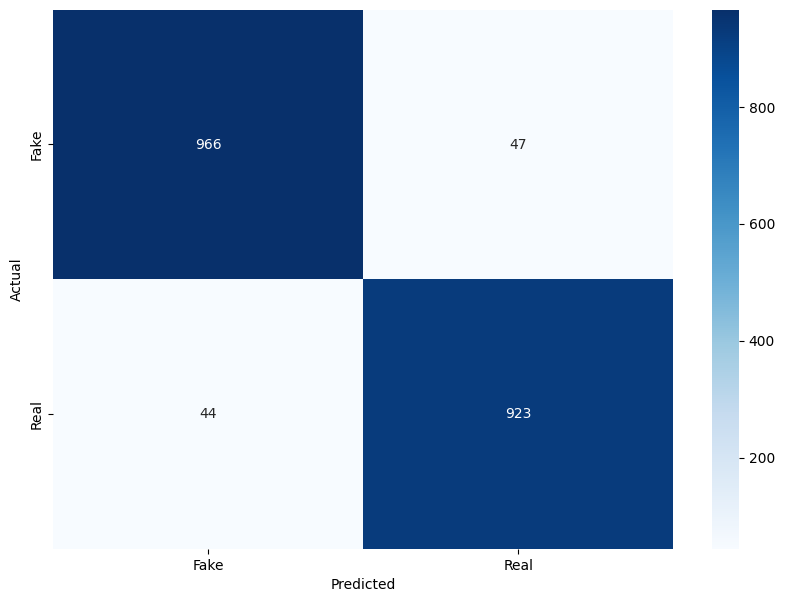

In [64]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from langdetect import detect
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure necessary NLTK data packages are downloaded
def download_nltk_data():
    nltk_data_path = os.path.join(os.getenv("USERPROFILE"), "nltk_data")  # Use USERPROFILE for Windows
    if not os.path.exists(nltk_data_path):
        os.makedirs(nltk_data_path)

    nltk.data.path.append(nltk_data_path)
    nltk.download('stopwords', download_dir=nltk_data_path)
    nltk.download('wordnet', download_dir=nltk_data_path)
    nltk.download('omw-1.4', download_dir=nltk_data_path)

class FakeNewsDetector:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.vectorizer = None
        self.model = None
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def load_and_preprocess_data(self):
        # Load and preprocess dataset
        self.df = pd.read_csv(self.data_path)
        self.df = self.df[['Text', 'label']]
        self.df.dropna(inplace=True)

        # Language detection and filtering (keep only English articles)
        self.df['language'] = self.df['Text'].apply(lambda x: detect(x))
        self.df = self.df[self.df['language'] == 'en']

        # Text cleaning function
        self.df['clean_text'] = self.df['Text'].apply(self.clean_text)

        # Print sample data
        print(self.df.head())
        print("Label distribution:\n", self.df['label'].value_counts())

    def clean_text(self, text):
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Remove numbers
        text = re.sub(r'\d+', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove stopwords
        text = ' '.join([word for word in text.split() if word not in self.stop_words])
        # Lemmatize words
        text = ' '.join([self.lemmatizer.lemmatize(word) for word in text.split()])
        return text

    def train_model(self):
        # TF-IDF vectorization
        self.vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
        X = self.vectorizer.fit_transform(self.df['clean_text'])
        y = self.df['label']

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

        # Train Naive Bayes classifier
        self.model = MultinomialNB()
        self.model.fit(X_train, y_train)

        # Predictions and evaluation
        y_pred = self.model.predict(X_test)
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred, labels=['Fake', 'Real'])
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

    def classify_text(self, text):
        try:
            text_cleaned = self.clean_text(text)
            text_vectorized = self.vectorizer.transform([text_cleaned])
            prediction = self.model.predict(text_vectorized)
            prediction_proba = self.model.predict_proba(text_vectorized)

            result = "Real" if prediction[0] == 'Real' else "Fake"
            confidence = max(prediction_proba[0])

            return f"Classification: {result}\nConfidence: {confidence:.2f}"
        except Exception as e:
            return f"Error during classification: {str(e)}"

    def setup_gui(self):
        root = tk.Tk()
        root.title("Fake News Detection")

        # Create a frame for the input and result
        frame_input = ttk.Frame(root)
        frame_input.pack(pady=10)

        # Label and Entry for input
        input_label = ttk.Label(frame_input, text="Enter News Article:")
        input_label.pack(pady=10)

        self.input_entry = tk.Text(frame_input, height=10, width=50)
        self.input_entry.pack()

        # Button to detect fake news
        detect_button = ttk.Button(frame_input, text="Detect Fake News", command=self.detect_fake_news)
        detect_button.pack(pady=10)

        # Label to display the result
        self.result_label = ttk.Label(frame_input, text="")
        self.result_label.pack(pady=10)

        root.mainloop()

    def detect_fake_news(self):
        input_text = self.input_entry.get("1.0", tk.END).strip()  # Retrieve text and strip extra whitespace
        if not input_text:
            messagebox.showerror("Error", "Please enter a news article.")
        else:
            result = self.classify_text(input_text)
            self.result_label.config(text=result)

# Usage
if __name__ == "__main__":
    download_nltk_data()  # Download NLTK data before proceeding
    detector = FakeNewsDetector('Task5/fake_and_real_news.csv')
    detector.load_and_preprocess_data()
    detector.train_model()
    detector.setup_gui()

In [52]:
import nltk

# Ensure necessary NLTK data packages are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [53]:
import nltk
import os

# Specify the path for nltk_data
nltk_data_path = os.path.join(os.getenv("USERPROFILE"), "nltk_data")  # Adjust for your OS
if not os.path.exists(nltk_data_path):
    os.makedirs(nltk_data_path)

# Append the path
nltk.data.path.append(nltk_data_path)

# Download the necessary resources
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cyber\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Cyber\nltk_data...
[nltk_data] Downloading package omw-1.4 to C:\Users\Cyber\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [54]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cyber\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [59]:
import nltk

print(nltk.data.path)

['C:\\Users\\Cyber/nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'c:\\Users\\Cyber\\anaconda3\\envs\\nullclass1\\nltk_data', 'c:\\Users\\Cyber\\anaconda3\\envs\\nullclass1\\lib\\nltk_data', 'C:\\Users\\Cyber\\AppData\\Roaming\\nltk_data', 'C:\\Users\\Cyber\\nltk_data', 'C:\\Users\\Cyber\\nltk_data', 'C:\\Users\\Cyber\\nltk_data', 'C:\\Users\\Cyber\\nltk_data', 'C:\\Users\\Cyber\\nltk_data', 'C:\\Users\\Cyber\\nltk_data', 'C:\\Users\\Cyber\\nltk_data', 'C:\\Users\\Cyber\\nltk_data']


In [61]:
from nltk.corpus import wordnet

try:
    # Test loading WordNet
    synsets = wordnet.synsets('dog')
    print("WordNet is available.")
    print("WordNet Synsets for 'dog':", synsets)
except LookupError as e:
    print(f"Error: {e}")

WordNet is available.
WordNet Synsets for 'dog': [Synset('dog.n.01'), Synset('frump.n.01'), Synset('dog.n.03'), Synset('cad.n.01'), Synset('frank.n.02'), Synset('pawl.n.01'), Synset('andiron.n.01'), Synset('chase.v.01')]
